In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
dfa=pd.read_excel(r"C:\Users\Vikas\jupyter book\ex_files\iris.xlsx")

In [5]:
df=pd.read_excel(r"C:\Users\Vikas\jupyter book\ex_files\iris.xlsx")

In [6]:
# ! pip install --upgrade pandas

In [7]:
# !  pip install pandas-profiling

In [8]:
df.head()

,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,0.2,1.4,3.5,5.1,Setosa
1,0.2,1.4,3.0,4.9,Setosa
2,0.2,1.3,3.2,4.7,Setosa
3,0.2,1.5,3.1,4.6,Setosa
4,0.2,1.4,3.6,5.0,Setosa


##### statis of data

In [9]:
df.describe()

,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,1.199333,3.758000,3.057333,5.843333
std,0.762238,1.765298,0.435866,0.828066
min,0.100000,1.000000,2.000000,4.300000
25%,0.300000,1.600000,2.800000,5.100000
50%,1.300000,4.350000,3.000000,5.800000
75%,1.800000,5.100000,3.300000,6.400000
max,2.500000,6.900000,4.400000,7.900000


#### EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal_width   150 non-null    float64
 1   Petal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Sepal_length  150 non-null    float64
 4   Species_name  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Petal_width', ylabel='Count'>

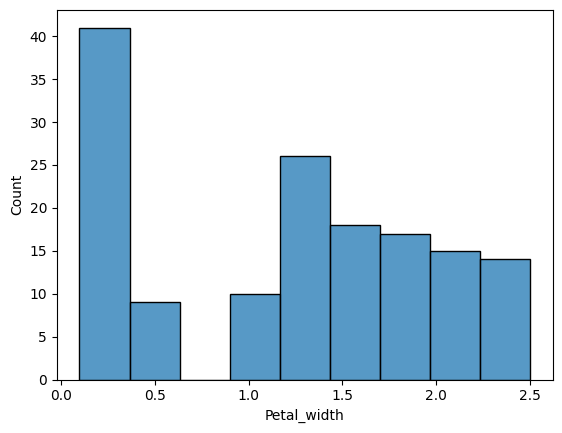

In [11]:
sns.histplot(df["Petal_width"],stat="count")

In [ ]:
sns.histplot(df["Petal_length"])

In [ ]:
sns.histplot(df["Sepal_width"])

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Sepal_length', ylabel='Count'>

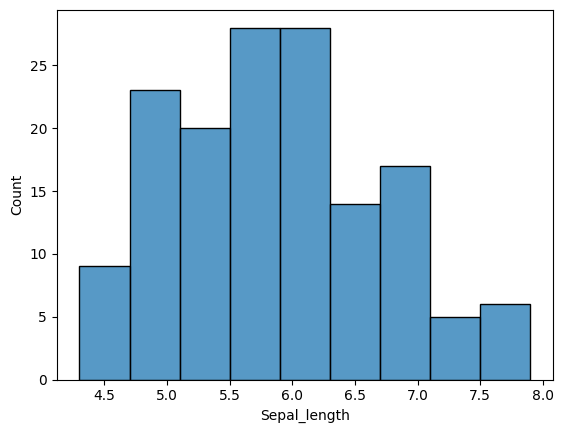

In [12]:
sns.histplot(df["Sepal_length"])

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

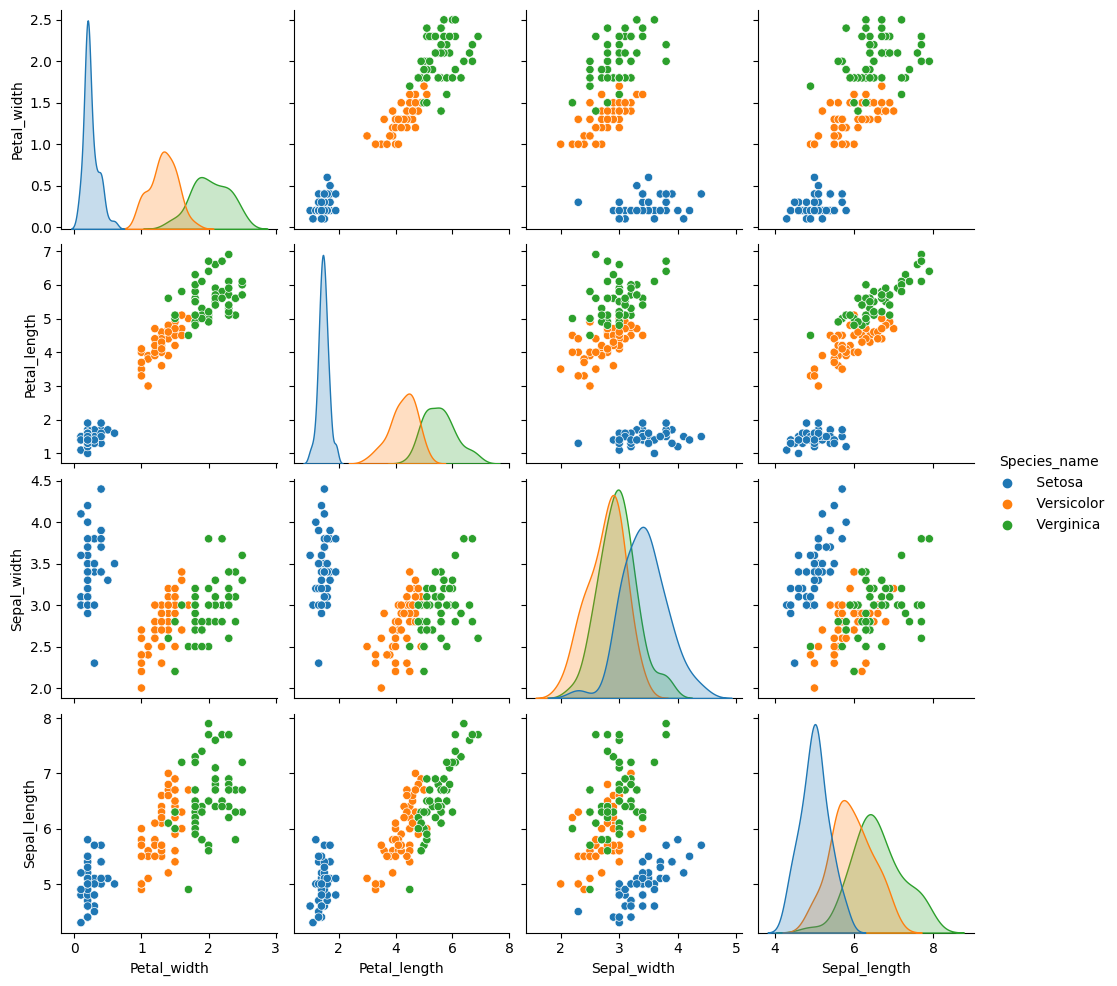

In [13]:
sns.pairplot(df,hue="Species_name")

In [18]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["Species_name"]=l.fit_transform(df["Species_name"])

<AxesSubplot: >

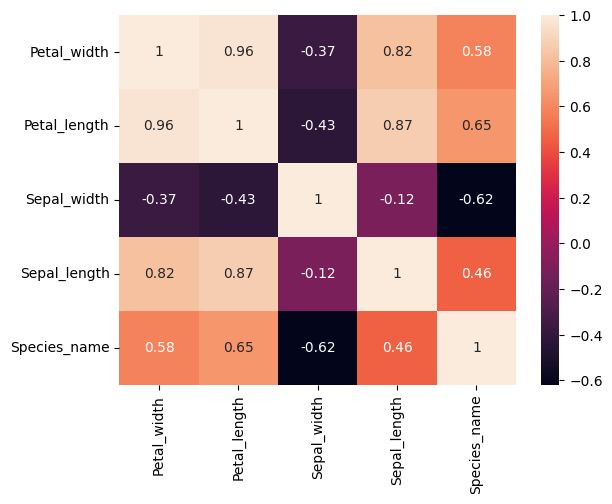

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal_width   150 non-null    float64
 1   Petal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Sepal_length  150 non-null    float64
 4   Species_name  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [22]:
#### our target column is species
x=df.drop(columns=["Species_name"])
y=df["Species_name"]

##### training model

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [25]:
x.shape

(150, 4)

In [26]:
y.shape

(150,)

### LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=12)
lr.fit(x_train,y_train)


C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=12)

In [36]:
pred=model.predict(x_test)

In [34]:
pred

array([2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 0])

In [41]:
from sklearn.metrics import *

In [45]:
accuracy_score(pred,y_test)*100

100.0

#### KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
Knn=knn.predict(x_test)

In [53]:
accuracy_score(Knn,y_test)*100

100.0

#### DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
D=d.predict(x_test)

In [60]:
accuracy_score(y_test,D)*100

96.66666666666667